In [1]:
!pip install -U -q scipy

You should consider upgrading via the '/Users/gerard/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [235]:
from scipy import io
v = io.loadmat('./10_100_100_500.mat')


In [236]:
freq_cut = v['cutFreq'][0][0]
max_generations = v['maxGen'][0][0]
experimentsFits = v['experimentBestFits']
experimentsBests = v['experimentBestProposals']
experimentsBestShapes = v['experimentBestShapes']
experimentsProposals = v['experimentCandidates']
experimentsAllFitness = v['experimentFitness']
total_proposals = len(experimentsBestShapes[0][0][0])
total_experiments = len(v['experimentBestShapes'][0])
print("Cut freq: "+str(freq_cut))
print("Max gen: "+str(max_generations))
print("Proposals/gen: "+str(total_proposals))
print("Total experiments: "+str(total_experiments))



Cut freq: 1000
Max gen: 50
Proposals/gen: 51
Total experiments: 10


In [252]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('./10_100_100_300.mat')
experimentProposals = mat['experimentBestProposals'][0]
experimentFits = mat['experimentBestFits'][0]
experimentProfiles = mat['experimentBestShapes'][0]

dataset = []

for iExperiment in range(len(experimentProposals)):
    nValue = []
    fit = []
    profileABH = []
    runout = experimentProposals[iExperiment][0]
    for iGen in range(len(runout)):
        experiment = runout[iGen][0]
        nValue.append(experiment[1][0][0])
        fit.append(experimentFits[iExperiment][0][iGen][0][0])
        profileABH.append(experimentProfiles[iExperiment][0][iGen][0])
    experiments = {
        'nValues': nValue,
        'fit': fit,
        'profileABH':profileABH
    }
    dataset.append(experiments)


1.6756891354164174
0.0420068825320154


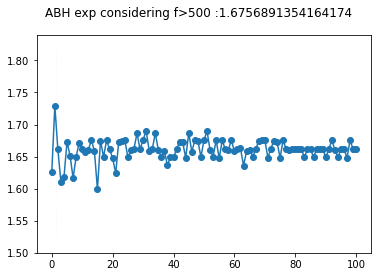

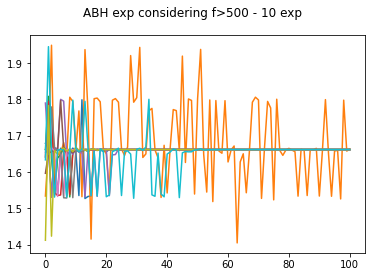

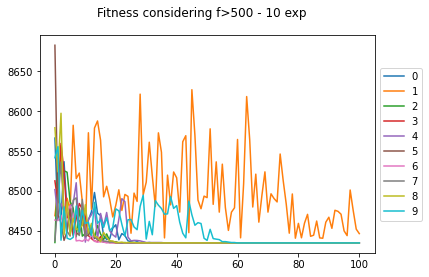

In [253]:
expNMean = []
for exp in dataset:
    expNMean.append(exp['nValues'][50])
print(np.mean(expNMean, axis=0))
print(np.std(expNMean, axis=0))

expNValues = []
for iRadius in range(len(dataset[0]['nValues'])):
    generation = []
    for experiment in dataset:
        generation.append(experiment['nValues'][iRadius])
    expNValues.append(generation)
    
nMean = []
nStdUp = []
nStdDown = []

for exp in expNValues:
    nMean.append(np.mean(exp, axis=0))
    nStdUp.append(np.mean(exp, axis=0)+np.std(exp, axis=0))
    nStdDown.append(np.mean(exp, axis=0)-np.std(exp, axis=0))

fig, (ax) = plt.subplots(1,1)
fig.suptitle('ABH exp considering f>500 :'+str(np.mean(expNMean)))
ax.fill_between(nMean,nStdUp,nStdDown , alpha=0.2)
ax.plot(nMean,'o-')

fig, (ax) = plt.subplots(1,1)
fig.suptitle('ABH exp considering f>500 - 10 exp')
for data in dataset:
    ax.plot(data['nValues'],'-')

fig, (ax) = plt.subplots(1,1)
fig.suptitle('Fitness considering f>500 - 10 exp')
current = 0
for data in dataset:
    ax.plot(data['fit'],'-')
plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))


8468.086278011244


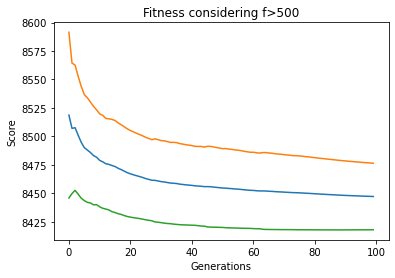

In [221]:
import numpy as np
import matplotlib.pyplot as plt



print(experimentsFits[0][4][0][1][0][0])

fitnessGlobal = []
fitnessGen = []
fitnessGlobalStd = []

for generation in range(max_generations):
    for experiment in range(total_experiments):
            fitnessGen.append(experimentsFits[0][experiment][0][generation][0][0])
    fitnessGlobal.append(np.mean(fitnessGen))     
    fitnessGlobalStd.append(np.std(fitnessGen))

plt.plot(fitnessGlobal)
plt.plot(np.zeros_like(proposalGlobal) + fitnessGlobal + fitnessGlobalStd)
plt.plot(np.zeros_like(proposalGlobal) + fitnessGlobal - fitnessGlobalStd)
plt.ylabel('Score')
plt.xlabel('Generations')
plt.title('Fitness considering f>'+str(freq_cut))
plt.show()


In [230]:
    
proposalsValue = []
proposalGlobal = []

print(experimentsBests[0][4][0][1][0][1])

for generation in range(max_generations):
    for experiment in range(total_experiments):
            #print("G:"+str(generation)+"P:"+str(proposal)+"E:"+str(experiment))
            proposalsValue.append(experimentsBests[0][experiment][0][generation][0][1])
    proposalGlobal.append(proposalsValue)  

print(proposalGlobal[99])



[[1.6661406]]
[array([[1.6789718]]), array([[1.53362831]]), array([[1.66169127]]), array([[1.64130348]]), array([[1.78992019]]), array([[1.59631473]]), array([[1.65452566]]), array([[1.66146558]]), array([[1.41176066]]), array([[1.63338042]]), array([[1.66538828]]), array([[1.67061948]]), array([[1.80834595]]), array([[1.79467557]]), array([[1.6661406]]), array([[1.65258328]]), array([[1.65455652]]), array([[1.6478965]]), array([[1.78305693]]), array([[1.94534367]]), array([[1.53418737]]), array([[1.94924159]]), array([[1.63895643]]), array([[1.77195213]]), array([[1.53007155]]), array([[1.65543617]]), array([[1.66647502]]), array([[1.77903049]]), array([[1.42305434]]), array([[1.66202953]]), array([[1.63482064]]), array([[1.53521536]]), array([[1.54334996]]), array([[1.54300286]]), array([[1.66696735]]), array([[1.66115433]]), array([[1.65812529]]), array([[1.66735038]]), array([[1.6594722]]), array([[1.53074478]]), array([[1.53613309]]), array([[1.64679122]]), array([[1.63846887]]), 

[[1.6661406]]


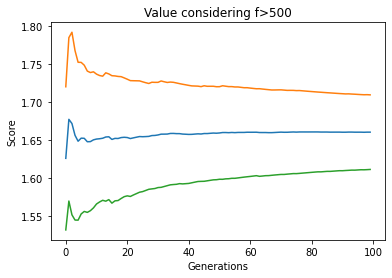

In [220]:
    
proposalsValue = []
proposalGlobal = []
proposalStd = []

print(experimentsBests[0][4][0][1][0][1])

for generation in range(max_generations):
    for experiment in range(total_experiments):
            #print("G:"+str(generation)+"P:"+str(proposal)+"E:"+str(experiment))
            proposalsValue.append(experimentsBests[0][experiment][0][generation][0][1])
    proposalGlobal.append(np.mean(proposalsValue))  
    proposalStd.append(np.std(proposalsValue))  

plt.plot(proposalGlobal)
plt.plot(np.zeros_like(proposalGlobal) + proposalGlobal + proposalStd)
plt.plot(np.zeros_like(proposalGlobal) + proposalGlobal - proposalStd)
plt.ylabel('Score')
plt.xlabel('Generations')
plt.title('Value considering f>'+str(freq_cut))
plt.show()


30.073657377245162


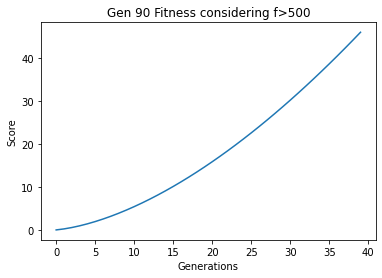

In [219]:
import numpy as np
import matplotlib.pyplot as plt


print(experimentsBestShapes[0][1][0][1][0][30])

rings = len(experimentsBestShapes[0][1][0][1][0])

bestShapesGlobal = []
bestShapes = []
for generation in range(max_generations):
  
    bestShapes = []
    for ring in range(rings):
        bestRing = []
        for experiment in range(total_experiments):
                bestRing.append(experimentsBestShapes[0][experiment][0][generation][0][ring])
        bestShapes.append(np.mean(bestRing))   
    bestShapesGlobal.append(bestShapes)
    
gen = 90
plt.plot(bestShapesGlobal[gen])
plt.ylabel('Score')
plt.xlabel('Generations')
plt.title('Gen '+str(gen)+' Fitness considering f>'+str(freq_cut))
plt.show()
